**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Fluoride Salt Cooled High-Temperature Channel Flow
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  Austin Rotker <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**25Apr2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [1-D Solo Fuel Dirichlet BC](#1dsolofueldirichlet)
   - [1-D Solo Fuel Dirichlet/Robin Normal Flux BC](#1dsolofueldirichletrobin)
   - [1-D Solo Coolant Dirichlet BC](#1dsolocoolantdirichlet)
   - [1-D *Joint* Fuel/Coolant Neumann/Robin Normal Flux BC](#1djointfuelcoolant) 
   - [1-D Coupled Fuel/Coolant Neumann/Robin Normal Flux BC](#1dcoupledfuelcoolant) 
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The Fluoride-Cooled High Temperature Reactor (FHR) is a generation IV design which boasts attractive safety features and economic properties; The FLIBE/NAFZIRF coolant proposed for use in FHRs is supplied to the secondary coolant loop at temperatures approaching 700 $^{\circ}$C, far in excess of outflow coolant temperatures seen in water-cooled designs, which results in higher Brayton cycle efficiency and opens the door for use in applications that can take advantage of very high temperature process heat. Furthermore, cooling during shutdown is accomplished through natural convection, improving safety and reliability as well as lowering capital costs significantly.

The particular design of interest shares similarities with a High Temperature Gas-Cooled Reactor (HTGR). Fuel is present as compacts encapsulated in a graphite prismatic core. The flow of salt through an annular cylindrical space is of interest to this design, therefore the present study analyses the conjugated heat transport between salt and solid fuel. The resulting mathematical problem has two field equations coupled at a domain interface.

## [Problem Statement](#toc)<a id="problem"></a>

Solve the Peclet heat transfer equation for the coolant temperature field 
mixture velocity $\Tc:\Omegac\subset\Reals^2\rightarrow\Reals$, and the Poisson equation for the fuel temperature field $\Tf:\Omegaf\subset\Reals^2\rightarrow\Reals$ such that

\begin{align*}
\rho c_p\,\gradx\Tc\cdot\velocity &= - \divx\fluxc \quad &\forall \quad \xpoint\in\Omegac, \\
                                0 &= - \divx\fluxf + S \quad &\forall \quad \xpoint\in\Omegaf,
\end{align*}

with the following boundary conditions for the salt

\begin{align*}
 \Tc(r, 0) &= {\Tc}_0 \quad &0 \le r \le \Ri \quad & \text{inflow}, \\
 q_{\text{c},z}(r, L) &= 0 \quad &0 \le r \le \Ri  \quad & \text{outflow}, \\
 q_{\text{c},r}(0, z) &= 0 \quad &0 \le z \le L \quad & \text{centerline},
\end{align*}

and the following boundary conditions for the fuel

\begin{align*}
 q_{\text{f},z}(r, 0) &= 0 \quad &\Ri \le r \le \Ro \quad & \text{bottom}, \\
 q_{\text{f},z}(r, L) &= 0 \quad &\Ri \le r \le \Ro \quad & \text{top}, \\
 q_{\text{f},r}(\Ro, z) &= h_\text{o}\,\bigl(\Tf(\Ro, z) - T_\text{ref}(z)\bigr) \quad &0 \le z \le L \quad & \text{external surface}.
\end{align*}

A separate and independent model is required for the the interface between coolant and fuel, that is

\begin{align*}
 q_{\text{c},r}(\Ri, z) &= q_{\text{f},r}(\Ri, z) \quad &0 \le z \le L \quad & \text{normal heat flux continuity} \\
 \Tf(\Ri, z) - \Tc(\Ri,z) &= -\frac{1}{h_\text{i}} q_{\text{c},r}(\Ri, z) + C_\text{i}\,\Tf \quad &0 \le z \le L \quad & \text{temperature jump} .
\end{align*}

That is, no interfacial thermal resistance is taken into account, therefore the normal heat flux is continuous at the interface. A temperature jump at the interface exists as a function of the interfacial normal flux and the temperature in the fuel. The coefficients $h_\text{i}$ (convective heat transfer) and $0 \le C_\text{i} < 1$ (interface adsorption) try to capture the underlying interfacial phenomena of thermal energy transfer.

### Domain
Consider FLIBE coolant flowing with a constant velocity $u$ = 2 m/s through the outer coolant flow channels of the graphite block, with outer radius $\Ro$ = 11.4 cm, inner radius $\Ri$ = 10cm, and active length $L$ = 12.0 m. Assume no cross flow from the reactor channel into the outer coolant flow channel, and vice versa. That salt enters the bottom of the flow channels with constant temperature ${\Tc}_0$ = 600$^{\circ}$C.

In [1]:
'''Domain'''

def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    height = 4.5*(3/4+2*1)
    radius_i = 3/4 / 2
    radius_o = radius_i + 1
    coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    pin = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o)
    coolant_o = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o + 1)

    plo = pv.Plotter(notebook=True, shape=(1,2)) 

    plo.subplot(0,0)
    plo.add_mesh(coolant, color='red', opacity=1.0,)
    plo.add_mesh(pin, color='tan', opacity=0.99)
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')

    pin = pin.triangulate()
    tmp = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*1.1, radius=radius_i).triangulate()
    tmp.flip_normals()

    pin = pin.boolean_cut(tmp)
    plo.subplot(0,1)
    plo.add_mesh(pin, 'grey')
    plo.add_mesh(pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*.98, radius=radius_i), 'red')
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

/home/dealmeida/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


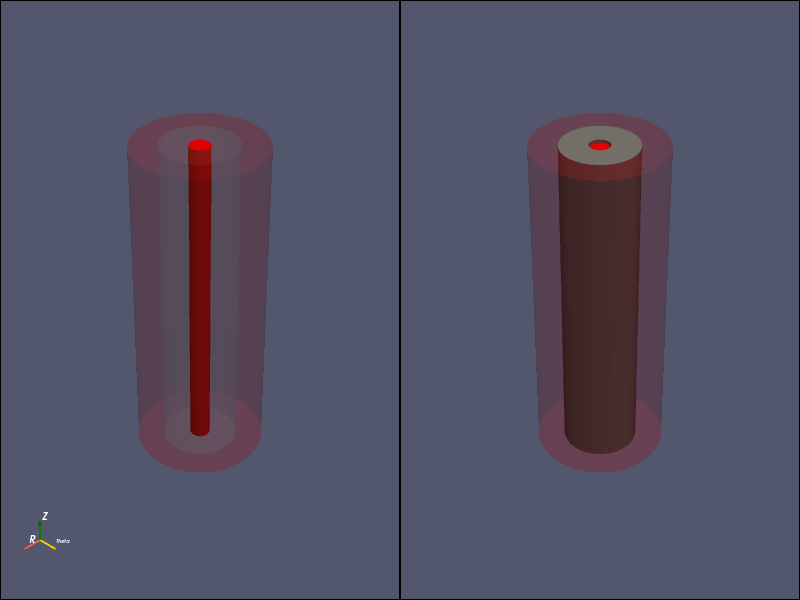

In [2]:
show_domain()

## [Objectives](#toc)<a id="obj"></a>

- State a consistent Galerkin weak form of the [strong problem](#problem).
- Apply finite element basis functions from MOOSE/Libmesh to obtain an algebraic system of equations.
- Using MOOSE/PETSc solvers, compute the temperature fields in the salt and fuel domains in steady state.

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The weak form on the coolant domain is: find $\Tc \in H^1\!\bigl(\Omegac\bigr)$ such that

\begin{align*}
 \int_{\Omegac} \rho_\text{c} c_{p,\text{c}}\, \grad_\xpoint \Tc \cdot \velocity \, \wc \, da
 - \int_{\Omegac} \fluxc \cdot \grad_\xpoint \wc \, da &= 0 \quad \forall \quad \wc \in H^1_0\!\bigl(\Omegac\bigr), 
\end{align*}

where $H^1\!\bigl(\Omegac\bigr) := \bigl\{ \Tc:\Omegac\subset\Reals^2\rightarrow \Reals \mid \int_{\Omegac} \grad_\xpoint \Tc\cdot\grad_\xpoint \Tc\,da < \infty \bigr\}$ and 
$H^1_0\!\bigl(\Omegac\bigr) := \bigl\{ \wc \mid \wc \in H^1(\Omegac), \wc(r,0) = 0 \ \ \forall \ \ 0 \le r \le \Ri \bigr\}$. 
Both function sets, as just defined, are Hilbert spaces. $\wc$ is the coolant test function. It assumes zero value on the inflow boundary of the domain.

<br>

The weak form on the fuel domain is: find $\Tf \in H^1\!\bigl(\Omegaf\bigr)$ such that

\begin{align*}
 - \int_{\Omegaf} \fluxf \cdot \grad_\xpoint \wf \, da 
 + \int_{\partial{\Omegaf}_\text{o}} h_\text{o}\,\bigl(\Tf(\Ro, z) - T_\text{ref}(z)\bigr) \wf \, dl
 - \int_{\Omegaf} S \, \wf \, da
 &= 0 \quad \forall \quad w_\text{f} \in H^1\!\bigl(\Omegaf\bigr).
\end{align*}

Note that the interface condition on temperature is what sets the temperature level on the fuel domain. However this has not been included in the forgoing yet. Therefore we add the weak forms of the interface conditions as follows:

\begin{align*}
\int_{\partial\Omega_I} \bigl(q_{\text{c},r}(\Ri, z) - q_{\text{f},r}(\Ri, z)\bigr) \, \wI \, dl &= 0 \quad \forall \quad \wI  \in L_2\!\bigl(\partial\Omega_\text{I}\bigr), \\
\int_{\partial\Omega_I} \Bigl( (1-C_\text{i})\,\Tf(\Ri, z) - \Tc(\Ri,z) + \frac{1}{h_\text{i}} q_{\text{c},r}(\Ri, z) \Bigr) \wI \, dl &= 0 \quad \forall \quad \wI  \in L_2\!\bigl(\partial\Omega_\text{I}\bigr)  .
\end{align*}

Note that the interface test function, $\wI$, is defined on the interface, $\partial\Omega_\text{I}$, and it can be discontinuous on the interface. 

When all combined, the weak forms above reproduce the solution of the [strong problem](#strong) if the strong solution is smooth enough. This can be verified by using the divergence theorem on the diffusion terms to obtain an inner product with the test functions. Under some smooth conditions, the weak solution also solves the strong problem.

The numerical solution of the weak form can be obtained by implementing a finite element approximation of the Hilbert spaces above using finitel element basis functions. For this purpose MOOSE framework will be used as described next.

### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the [weak form](#weakform):
1. Heat conduction by diffusion (coolant and fuel):
 + [definition](./include/kernels/HeatConduction.h) and [implementation](./src/kernels/HeatConduction.C).
1. Heat convection on the coolant domain:
 + [definition](./include/kernels/HeatConvection.h) and [implementation](./src/kernels/HeatConvection.C).
1. Diffusion normal heat flux boundary condition (for any surface):
 + [definition](./include/bcs/NormalFluxBC.h) and [implementation](./src/bcs/NormalFluxBC.C).
1. Diffusion heat flux:
 + [definition](./include/auxkernels/HeatFlux.h) and [implementation](./src/auxkernels/HeatFlux.C).
1. Normal heat flux BC:
 + [definition](./include/bcs/NormalHeatFluxBC.h) and [implementation](./src/bcs/NormalHeatFluxBC.C).
1. Interface normal heat flux continuity:
 + [definition](./include/interfkernels/InterfaceNormalFluxContinuity.h) and [implementation](./src/interfkernels/InterfaceNormalFluxContinuity.C).

### [Tests](#toc)<a id="tests"></a>

This section provides a walk-through of steps used to progressively implement the FEM solution of [the problem](#weakform) using MOOSE. This is best done by solving the 1-D problem first, starting from the fuel problem wherein heat is generated and moving next to the cooling problem. The data used is for testing purposes. The progression is as follows: 

 1. [Solve](#1dsolofueldirichlet) for heat conduction on the fuel using Dirichlet BC.
 1. [Solve](#1dsolofuelconvflux) for heat conduction on the fuel using Dirichlet/Robin BC.
 1. [Solve](#1dsolocoolantdirichlet) for heat conduction on the coolant using Neumann/Dirichlet BC.
 1. [Solve](#1dfuelcoolantcoupledconvectivenormalflux) for *joint* heat conduction on coolant/fuel using Dirichlet/Robin BC.

In [3]:
'''Plot function for FEM Solution'''

def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend',
                  flux_decimal_digits=5):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')
    import numpy as np

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        ax1.plot(df1['x']*x_scale, df1['tempCoolant'].round(2)*y1_scale,'r*-',label=u1_legend)
    if df2 is not None:
        ax1.plot(df2['x']*x_scale, df2['tempFuel'].round(2)*y1_scale,'r*--',label=u2_legend)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)
    
    ax2 = None

    if df1 is not None and 'heatFluxCoolant_r' in df1.columns:

        ax2 = ax1.twinx()
        ax2.plot(df1['x']*x_scale, np.round(df1['heatFluxCoolant_r'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'heatFluxFuel_r' in df2.columns:
        
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, np.round(df2['heatFluxFuel_r'].round(2)*y2_scale, flux_decimal_digits),'*--', color='yellow', label=u2_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='yellow')
        ax2.tick_params(axis='y', labelcolor='yellow', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

### [Setup](#toc)<a id="setup"></a>

In [4]:
'''Domain'''

r_i = 1e-2 # m
r_o = 4e-2 # m

In [5]:
'''Parameters'''

k_fuel = 250 # W/m/K
s_source = 10e+6 # W/m^3

In [6]:
'''Data (boundary conditions for testing purposes)'''

temp_i = 550+273.15 # K
temp_o = 550+273.15 # K

In [7]:
'''FEM Solution'''

n_felem = 10
order = 'second'
flux_order = 'first'
n_plot_pts = 2*n_felem + 1

#### [1-D Solo Fuel Dirichlet BC](#toc)<a id="1dsolofueldirichlet"></a>
Here the conduction of heat is solved with Dirichlet BC on both $r_\text{i}$ and $r_\text{o}$.

In [8]:
def write_input_file_1d_solo_fuel():
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'RZ'
    prblm['rz_coord_axis'] = 'Y'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = r_i
    omega['xmax'] = r_o
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    temp_fuel = vars.insert(-1,'tempFuel')
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = (temp_i+temp_o)/2
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxFuel')
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxFuel_r')
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-fuel')
    conduction['type'] = 'HeatConduction'
    conduction['variable'] = 'tempFuel'
    conduction['thermCond'] = k_fuel
    
    source = kernels.insert(-1,'nuclear-heat-fuel')
    source['type'] = 'NuclearHeat'
    source['variable'] = 'tempFuel'
    source['sourceS'] = s_source
    
    aux_kernels = root.insert(-1,'AuxKernels')
        
    heat_flux = aux_kernels.insert(-1,'heat-flux-fuel')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['field'] = 'tempFuel'
    heat_flux['thCondCoeff'] = k_fuel
    heat_flux['variable'] = 'heatFluxFuel'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-fuel-r')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['vector_variable'] = 'heatFluxFuel'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxFuel_r'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    ri = bcs.insert(-1,'ri')
    ri['type'] = 'DirichletBC'
    ri['variable'] = 'tempFuel'
    ri['boundary'] = 'left'
    ri['value'] = temp_i
    
    ro = bcs.insert(-1,'ro')
    ro['type'] = 'DirichletBC'
    ro['variable'] = 'tempFuel'
    ro['boundary'] = 'right'
    ro['value'] = temp_o 

    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    exe['l_max_its']  = 20
    exe['l_tol']  = 1e-5
    exe['nl_max_its']  = 15
    exe['nl_rel_tol']  = 1e-8
    exe['nl_abs_tol']  = 1e-8

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'omega')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'tempFuel heatFluxFuel_r'  
    omega['start_point'] = str(r_i)+' 0 0'
    omega['end_point'] = str(r_o)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('input.hit', root)

In [9]:
'''Input file'''

write_input_file_1d_solo_fuel()

!cat input.hit

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.01
    xmax = 0.04
    nx = 10
    elem_type = edge3
  []
[]
[Variables]
  [tempFuel]
    order = second
    family = lagrange
    initial_condition = 823.15
  []
[]
[AuxVariables]
  [heatFluxFuel]
    order = first
    family = monomial_vec
  []
  [heatFluxFuel_r]
    order = first
    family = monomial
  []
[]
[Kernels]
  [heat-conduction-fuel]
    type = HeatConduction
    variable = tempFuel
    thermCond = 250
  []
  [nuclear-heat-fuel]
    type = NuclearHeat
    variable = tempFuel
    sourceS = 10000000.0
  []
[]
[AuxKernels]
  [heat-flux-fuel]
    type = HeatFlux
    field = tempFuel
    thCondCoeff = 250
    variable = heatFluxFuel
    execute_on = timestep_end
  []
  [heat-flux-fuel-r]
    type = VectorVariableComponentAux
    vector_variable = heatFluxFuel
    component = x
    variable = heatFluxFuel_r
    execute_on = timestep_en

In [10]:
'''Run FHR MOOSE App'''

!./fhr-opt -i input.hit



Framework Information:
MOOSE Version:           git commit a7f499ed31 on 2021-04-30
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Wed May 19 01:11:37 2021
Executable Timestamp:    Tue May 18 11:47:08 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 21
    Local:                 21
  Elems:                   
    Total:                 10
    Local:                 10
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                21
  Num Local DOFs:          21
  Variables:               "tempFuel" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                40
  Num Local DOFs:          40
 

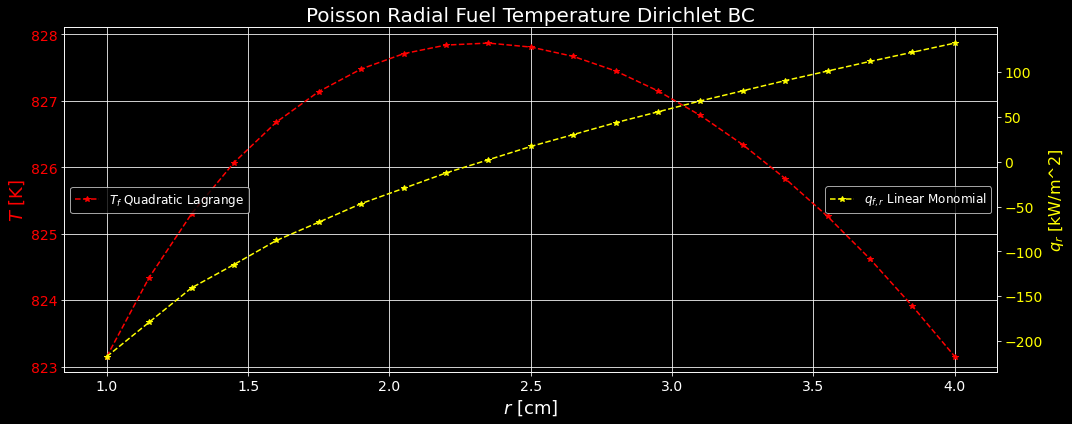

In [11]:
import pandas as pd
df = pd.read_csv('output_omega_0002.csv')

plot_solution(df1=None, df2=df,
              x_scale=100,
              y2_scale=1/1000,
              xlabel=r'$r$ [cm]', 
              y1label=r'$T$ [K]',
              y2label=r'$q_r$ [kW/m^2]',
              title='Poisson Radial Fuel Temperature Dirichlet BC', 
              u2_legend=r'$T_f$ Quadratic Lagrange',
              u2_flux_legend=r'$q_{f,r}$ Linear Monomial',
              flux_decimal_digits=8)

Note non-symmetric profile due to the curvature of the domain in the radial direction.

#### [1-D Solo Fuel Dirichlet/Robin Normal Flux BC](#toc)<a id="1dsolofueldirichletrobin"></a>
Here the conduction of heat is solved with Dirichlet BC on $\Ri$ and convective heat transfer on $\Ro$

\begin{align*}
 q_{\text{f},r}(\Ro) = h_\text{o}\,\bigl(\Tf(\Ro) - T_\text{ref}\bigr) \quad  \text{external surface}.
\end{align*}
 
The previous input file is modified to use the new boundary condition on the outer surface of the fuel.

In [12]:
'''Parameters'''

temp_ref = 457+273.15 # K

transferCoeff = 1000 # W/m^2/K

In [13]:
'''Input file mod'''

import pyhit
import moosetree
root = pyhit.load('input.hit')

functions = moosetree.find(root, func=lambda n: n.fullpath == '/Functions')
if functions is None:
    functions = root.insert(-1,'Functions')

ref_temp_func = moosetree.find(root, func=lambda n: n.fullpath == '/Functions/refTempFunc')
if ref_temp_func is None:
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    
ref_temp_func['type'] = 'ParsedFunction'
ref_temp_func['value'] = 'temp_ref'
ref_temp_func['vars'] = 'temp_ref'
ref_temp_func['vals'] = str(temp_ref)

ro = moosetree.find(root, func=lambda n: n.fullpath == '/BCs/ro')
if ro is not None:
    ro.remove()
    bcs = moosetree.find(root, func=lambda n: n.fullpath == '/BCs')
    
ro = bcs.insert(-1,'ro')
ro['type'] = 'NormalHeatFluxBC'
ro['variable'] = 'tempFuel'
ro['boundary'] = 'right'
ro['refTempFunc'] = 'refTempFunc'
ro['transferCoeff'] = transferCoeff

pyhit.write('input.hit', root)

!cat input.hit

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.01
    xmax = 0.04
    nx = 10
    elem_type = edge3
  []
[]
[Variables]
  [tempFuel]
    order = second
    family = lagrange
    initial_condition = 823.15
  []
[]
[AuxVariables]
  [heatFluxFuel]
    order = first
    family = monomial_vec
  []
  [heatFluxFuel_r]
    order = first
    family = monomial
  []
[]
[Kernels]
  [heat-conduction-fuel]
    type = HeatConduction
    variable = tempFuel
    thermCond = 250
  []
  [nuclear-heat-fuel]
    type = NuclearHeat
    variable = tempFuel
    sourceS = 10000000.0
  []
[]
[AuxKernels]
  [heat-flux-fuel]
    type = HeatFlux
    field = tempFuel
    thCondCoeff = 250
    variable = heatFluxFuel
    execute_on = timestep_end
  []
  [heat-flux-fuel-r]
    type = VectorVariableComponentAux
    vector_variable = heatFluxFuel
    component = x
    variable = heatFluxFuel_r
    execute_on = timestep_en

In [14]:
'''Run FHR MOOSE App'''

!./fhr-opt -i input.hit



Framework Information:
MOOSE Version:           git commit a7f499ed31 on 2021-04-30
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Wed May 19 01:11:39 2021
Executable Timestamp:    Tue May 18 11:47:08 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 21
    Local:                 21
  Elems:                   
    Total:                 10
    Local:                 10
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                21
  Num Local DOFs:          21
  Variables:               "tempFuel" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                40
  Num Local DOFs:          40
 

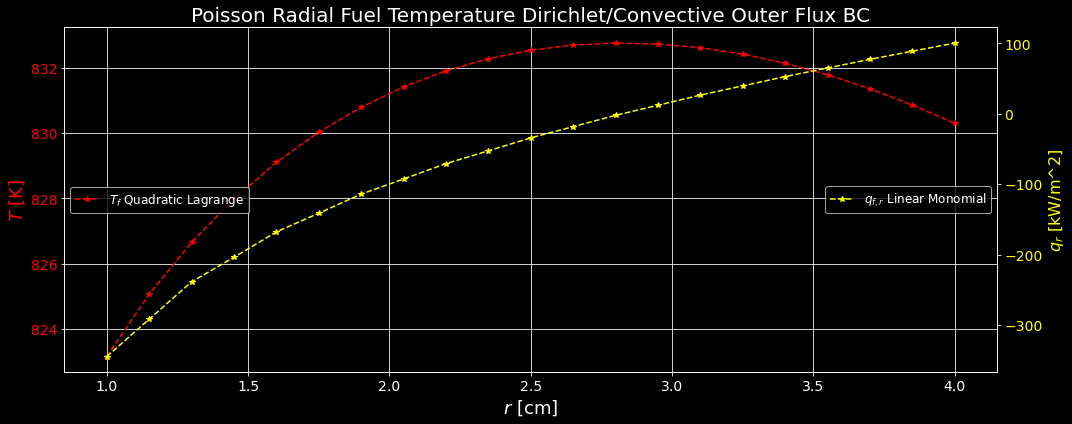

In [15]:
import pandas as pd
df = pd.read_csv('output_omega_0002.csv')

plot_solution(df1=None, df2=df, 
              x_scale=100,
              y2_scale=1/1000,
              xlabel=r'$r$ [cm]', 
              y1label=r'$T$ [K]',
              y2label=r'$q_r$ [kW/m^2]',
              title='Poisson Radial Fuel Temperature Dirichlet/Convective Outer Flux BC',  
              u2_legend=r'$T_f$ Quadratic Lagrange',
              u2_flux_legend=r'$q_{f,r}$ Linear Monomial',
              flux_decimal_digits=8)

#### [1-D Solo Coolant Dirichlet BC](#toc)<a id="1dsolocoolantdirichlet"></a>

This section implements the solution of the coolant problem including convective heat transfer. However the velocity field is axial and will not affect the solution, therefore we will add an artificial sink of energy to account for the convective heat transport in the coolant for the purpose of testing the implementation only.

In [16]:
'''Parameters'''

k_coolant = 1 # w/m/K
rho_coolant = 3500 # kg/m^3
cp_coolant = 2400 # J/kg/K

velocity = (0, 0, 1)  # m/s

artificial_sink = -2e+6 # W/m^3

In [17]:
'''FEM Solution'''

n_felem = 10
order = 'second'
flux_order = 'first'
n_plot_pts = 2*n_felem + 1

In [18]:
def write_input_file_1d_solo_coolant():
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'RZ'
    prblm['rz_coord_axis'] = 'Y'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = 0
    omega['xmax'] = r_i
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempCoolant')
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = temp_i
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxCoolant_r')
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    sink = kernels.insert(-1,'artificial-sink')
    sink['type'] = 'NuclearHeat'
    sink['variable'] = 'tempCoolant'
    sink['sourceS'] = artificial_sink
      
    aux_kernels = root.insert(-1,'AuxKernels')
        
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-r')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_r'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempCoolant'
    cl['boundary'] = 'left'
    cl['value'] = 0 
    
    ri = bcs.insert(-1,'ri')
    ri['type'] = 'DirichletBC'
    ri['variable'] = 'tempCoolant'
    ri['boundary'] = 'right'
    ri['value'] = temp_i
    
    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    #exe['l_max_its']  = 20
    #exe['l_tol']  = 1e-5
    #exe['nl_max_its']  = 15
    #exe['nl_rel_tol']  = 1e-4
    #exe['nl_abs_tol']  = 1e-6

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'omega')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'tempCoolant heatFluxCoolant_r'  
    omega['start_point'] = '0 0 0'
    omega['end_point'] = str(r_i)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('input.hit', root)

In [19]:
'''Input file'''

write_input_file_1d_solo_coolant()

!cat input.hit

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 0.01
    nx = 10
    elem_type = edge3
  []
[]
[Variables]
  [tempCoolant]
    order = second
    family = lagrange
    initial_condition = 823.15
  []
[]
[AuxVariables]
  [heatFluxCoolant]
    order = first
    family = monomial_vec
  []
  [heatFluxCoolant_r]
    order = first
    family = monomial
  []
[]
[Kernels]
  [heat-conduction-coolant]
    type = HeatConduction
    variable = tempCoolant
    thermCond = 1
  []
  [heat-convection-coolant]
    type = HeatConvection
    variable = tempCoolant
    massDensity = 3500
    heatCapacity = 2400
    velocity = '0 0 1'
  []
  [artificial-sink]
    type = NuclearHeat
    variable = tempCoolant
    sourceS = -2000000.0
  []
[]
[AuxKernels]
  [heat-flux-coolant]
    type = HeatFlux
    field = tempCoolant
    thCondCoeff = 1
    variable = heatFluxCoolant
    execute_on = timestep_end
 

In [20]:
'''Run FHR MOOSE App'''

!./fhr-opt -i input.hit



Framework Information:
MOOSE Version:           git commit a7f499ed31 on 2021-04-30
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Wed May 19 01:11:39 2021
Executable Timestamp:    Tue May 18 11:47:08 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 21
    Local:                 21
  Elems:                   
    Total:                 10
    Local:                 10
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                21
  Num Local DOFs:          21
  Variables:               "tempCoolant" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                40
  Num Local DOFs:          4

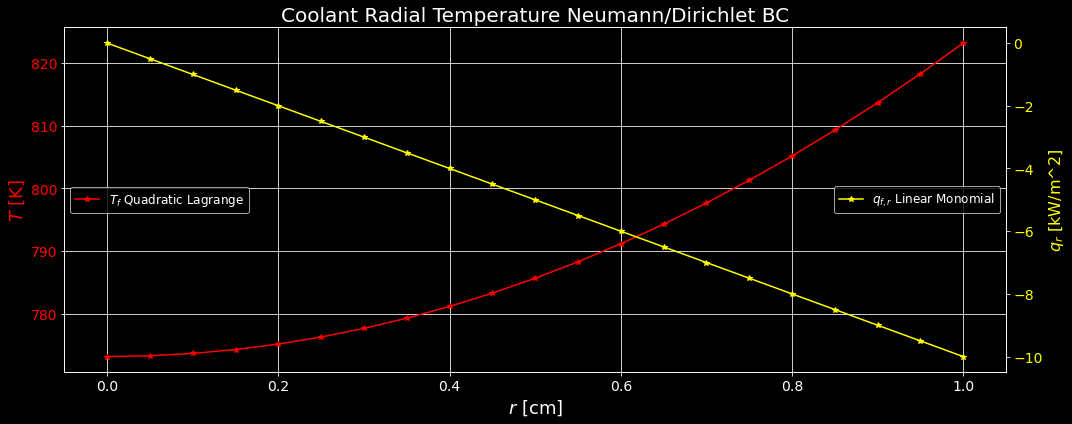

In [21]:
import pandas as pd
df = pd.read_csv('output_omega_0002.csv')

plot_solution(df1=df, df2=None, 
              x_scale=100,
              y2_scale=1/1000,
              xlabel=r'$r$ [cm]', 
              y1label=r'$T$ [K]',
              y2label=r'$q_r$ [kW/m^2]',
              title='Coolant Radial Temperature Neumann/Dirichlet BC', 
              u1_legend=r'$T_f$ Quadratic Lagrange',
              u1_flux_legend=r'$q_{f,r}$ Linear Monomial',
              flux_decimal_digits=8)

Here the convective term in the energy balance equation is implemented, however it has no effect since the temperature gradient in the direction of the velocity (axial) is the zero vector. The temperature profile with decreasing temperature towards the centerline is due to the artificial sink term. The profile is parabolic in $r$.

TODO: fit a 2nd degree polynomial and compare

#### [1-D *Joint* Fuel/Coolant Neumann/Robin Normal Flux BC](#toc)<a id="1djointfuelcoolant"></a>
What is meant here by *joint* fuel/coolant is to solve for heat transfer in both domains occupied by the coolant and fuel without satisfying the interfacial conditions. This allows for a progressive step towards solving the coupled problem where the domain and the finite element mesh are treated separately before attempting to impose interface conditions on the boundary of the sub-domains. Hence here the primary objective is the creation of the sub-domains $\Omegac$, an $\Omegaf$.

Note below that this test does not have a Dirichlet boundary condition imposed however the reference temperature on the Robin boundary condition of convection heat transfer on the outer surface of the fuel sets a temperature level for the system.

This case is involved and it is better to create a new input file generation function instead of trying to modify the previous input file.

In [85]:
'''Parameters'''

artificial_sink = -1e+6 # W/m^3

In [86]:
'''FEM parameters'''

order = 'second'
n_felem_cool = 10
n_felem_fuel = 15
n_plot_pts_cool = 2*n_felem_cool + 1
n_plot_pts_fuel = 2*n_felem_fuel + 1

fdp_full = True

In [106]:
def write_input_file_1d_coupled(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'RZ'
    prblm['rz_coord_axis'] = 'Y'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = 0
    omega1['xmax'] = r_i
    omega1['nx'] = n_felem_cool
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = r_i
    omega2['xmax'] = r_o
    omega2['nx'] = n_felem_fuel
    if order == 'second':
        omega2['elem_type'] = 'edge3'
 
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2'"
    omega['stitch_boundaries_pairs'] = "'right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = '0 0 0'
    mod1['top_right'] = str(r_i)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(r_i)+' 0 0'
    mod2['top_right'] = str(r_o)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod3['input'] = 'mod2'
    mod3['primary_block'] = 'omega_1'
    mod3['paired_block'] = 'omega_2' 
    mod3['new_boundary'] = 'interface_12'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsAroundSubdomainGenerator'
    mod4['input'] = 'mod3'
    mod4['block'] = 'omega_1'
    mod4['normal'] = '-1 0 0'
    mod4['new_boundary'] = 'omega_1_left'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsAroundSubdomainGenerator'
    mod5['input'] = 'mod4'
    mod5['block'] = 'omega_2'
    mod5['normal'] = '1 0 0'
    mod5['new_boundary'] = 'omega_2_right'
    
    # This is for testing purposes only; coolant needs a temperature level at the interface
    mod6 = mesh.insert(-1,'mod6')
    mod6['type'] = 'SideSetsAroundSubdomainGenerator'
    mod6['input'] = 'mod5'
    mod6['block'] = 'omega_1'
    mod6['normal'] = '1 0 0'
    mod6['new_boundary'] = 'omega_1_right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempCoolant')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = temp_ref
    
    temp_fuel = vars.insert(-1,'tempFuel')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = temp_ref
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxCoolant_r')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxFuel')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxFuel_r')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_1'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    sink = kernels.insert(-1,'artificial-sink-coolant')
    sink['type'] = 'NuclearHeat'
    sink['block'] = 'omega_1'
    sink['variable'] = 'tempCoolant'
    sink['sourceS'] = artificial_sink
    
    conduction = kernels.insert(-1,'heat-conduction-fuel')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempFuel'
    conduction['thermCond'] = k_fuel
    
    source = kernels.insert(-1,'nuclear-heat-fuel')
    source['type'] = 'NuclearHeat'
    source['block'] = 'omega_2'
    source['variable'] = 'tempFuel'
    source['sourceS'] = s_source
    
    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-r')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_r'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-fuel')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempFuel'
    heat_flux['thCondCoeff'] = k_fuel
    heat_flux['variable'] = 'heatFluxFuel'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-fuel-r')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxFuel'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxFuel_r'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempCoolant'
    cl['boundary'] = 'omega_1_left'
    cl['value'] = 0 
    
    ro = bcs.insert(-1,'ro')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempFuel'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = transferCoeff
    
    # This is for testing purposes only; coolant needs a temperature level
    ri = bcs.insert(-1,'ri')
    ri['type'] = 'DirichletBC'
    ri['variable'] = 'tempCoolant'
    ri['boundary'] = 'omega_1_right'
    ri['value'] = temp_i
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempCoolant heatFluxCoolant_r'  
    omega_1['start_point'] = '0 0 0'
    omega_1['end_point'] = str(r_i*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_cool
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempFuel heatFluxFuel_r'  
    omega_2['start_point'] = str(r_i*1.005)+' 0 0'
    omega_2['end_point'] = str(r_o)+' 0 0'
    omega_2['num_points'] = n_plot_pts_fuel
    omega_2['sort_by'] = 'id'  

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

In [107]:
'''Input file'''

write_input_file_1d_coupled()

!cat input.hit

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 0.01
    nx = 100
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.01
    xmax = 0.04
    nx = 150
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2'
    stitch_boundaries_pairs = 'right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0 0 0'
    top_right = '0.01 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.01 0 0'
    top_right = '0.04 1 0'
  []
  [mod3]
    type = SideSetsBetweenSubdomainsGenerator
    input = mod2
    primary_block = omega_1
    paired_block = omega_2
    new_boundary = interface_12
  []
  [mod4

In [108]:
'''Run FHR MOOSE App'''

!./fhr-opt -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.0001.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.


Framework Information:
MOOSE Version:           git commit a7f499ed31 on 2021-04-30
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Wed May 19 03:49:40 2021
Executable Timestamp:    Wed May 19 03:16:52 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 501
    Local:                 501
  Elems:                   
    Total:                 250
    Local:                 250
  Num Subdomains:          2
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                502
  Nu

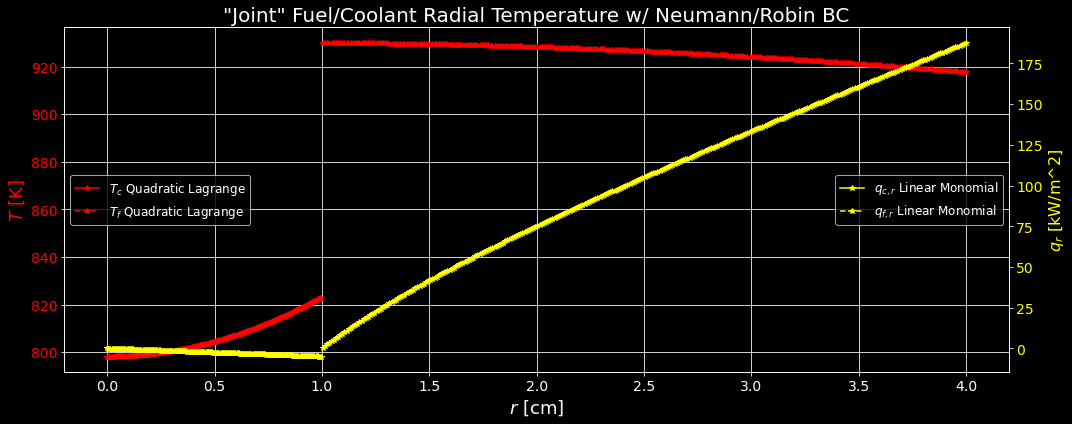

In [109]:
import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')

plot_solution(df1=df1, df2=df2, 
              x_scale=100,
              y2_scale=1/1000,
              xlabel=r'$r$ [cm]', 
              y1label=r'$T$ [K]',
              y2label=r'$q_r$ [kW/m^2]',
              title='"Joint" Fuel/Coolant Radial Temperature w/ Neumann/Robin BC', 
              u1_legend=r'$T_c$ Quadratic Lagrange',
              u1_flux_legend=r'$q_{c,r}$ Linear Monomial',
              u2_legend=r'$T_f$ Quadratic Lagrange',
              u2_flux_legend=r'$q_{f,r}$ Linear Monomial',
              flux_decimal_digits=8)

Note that here the *joint* problem does not satisfy any interface condition. This indicates that the coolant and fuel sub-domain meshes have been correctly implemented. The temperature profile in the coolant is parabolic.

TODO: fit parabola to coolant temperature

#### [1-D Coupled Fuel/Coolant Neumann/Robin Normal Flux BC](#toc)<a id="1dcoupledfuelcoolant"></a>
Here the [interface conditions](#weakform) are enforced by modifying the input file from the previous case.

In [110]:
'''Parameters'''

artificial_sink = -1e+6 # W/m^3

In [111]:
'''FEM parameters'''

n_felem_cool = 100
n_felem_fuel = 150
n_plot_pts_cool = 2*n_felem_cool + 1
n_plot_pts_fuel = 2*n_felem_fuel + 1

fdp_full = True

In [112]:
'''Input file mod'''

import pyhit
import moosetree
root = pyhit.load('input.hit')

# Remove the existing interface condition used for testing purposes
ri = moosetree.find(root, func=lambda n: n.fullpath == '/BCs/ri')
if ri is not None:
    ri.remove()

# Remove geometry tagging
mod6 = moosetree.find(root, func=lambda n: n.fullpath == '/Mesh/mod6')
if mod6 is not None:
    mod6.remove()
    
# Remove coolant artificial sink
sink = moosetree.find(root, func=lambda n: n.fullpath == '/Kernels/artificial-sink-coolant')
#if sink is not None:
#    sink.remove()
sink['value'] = artificial_sink

interf_kernels = moosetree.find(root, func=lambda n: n.fullpath == '/InterfaceKernels')
if interf_kernels is None:
    interf_kernels = root.insert(-1,'InterfaceKernels')
    
n_flux = moosetree.find(root, func=lambda n: n.fullpath == '/InterfaceKernels/normal-heat-flux-continuity')
if n_flux is not None:
    n_flux.remove()
    
n_flux = interf_kernels.insert(-1,'normal-heat-flux-continuity')
n_flux['type'] = 'InterfaceNormalFluxContinuity'
n_flux['variable'] = 'tempCoolant'
n_flux['neighbor_var'] = 'tempFuel'
n_flux['boundary'] = 'interface_12'
n_flux['thermCond'] = k_coolant
n_flux['thermCondNeighbor'] = k_fuel

t_jump = moosetree.find(root, func=lambda n: n.fullpath == '/InterfaceKernels/temperature-jump')
if t_jump is not None:
    t_jump.remove()
    
t_jump = interf_kernels.insert(-1,'temperature-jump')
t_jump['type'] = 'InterfaceJump'
t_jump['variable'] = 'tempCoolant'
t_jump['neighbor_var'] = 'tempFuel'
t_jump['boundary'] = 'interface_12'
t_jump['transferCoeff'] = 1000000000
t_jump['adsorptionCoeff'] = 0.0
t_jump['thermCondCoeff'] = k_coolant

omega1 = moosetree.find(root, func=lambda n: n.fullpath == '/Mesh/omega1')
omega1['nx'] = n_felem_cool

omega2 = moosetree.find(root, func=lambda n: n.fullpath == '/Mesh/omega2')
omega2['nx'] = n_felem_fuel

omega_1 = moosetree.find(root, func=lambda n: n.fullpath == '/VectorPostprocessors/omega_1')
omega_1['num_points'] = n_plot_pts_cool

omega_2 = moosetree.find(root, func=lambda n: n.fullpath == '/VectorPostprocessors/omega_2')
omega_2['num_points'] = n_plot_pts_fuel

pyhit.write('input.hit', root)

!cat input.hit

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 0.01
    nx = 100
    elem_type = edge3
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.01
    xmax = 0.04
    nx = 150
    elem_type = edge3
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2'
    stitch_boundaries_pairs = 'right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0 0 0'
    top_right = '0.01 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.01 0 0'
    top_right = '0.04 1 0'
  []
  [mod3]
    type = SideSetsBetweenSubdomainsGenerator
    input = mod2
    primary_block = omega_1
    paired_block = omega_2
    new_boundary = interface_12
  []
  [mod4

In [113]:
'''Run FHR MOOSE App'''

!./fhr-opt -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.0001.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.


Framework Information:
MOOSE Version:           git commit a7f499ed31 on 2021-04-30
LibMesh Version:         27141d18f3137f77e33cdb3d565fd38ebfbfc46f
PETSc Version:           3.15.0
SLEPc Version:           3.14.2
Current Time:            Wed May 19 03:49:49 2021
Executable Timestamp:    Wed May 19 03:16:52 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 501
    Local:                 501
  Elems:                   
    Total:                 250
    Local:                 250
  Num Subdomains:          2
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                502
  Nu

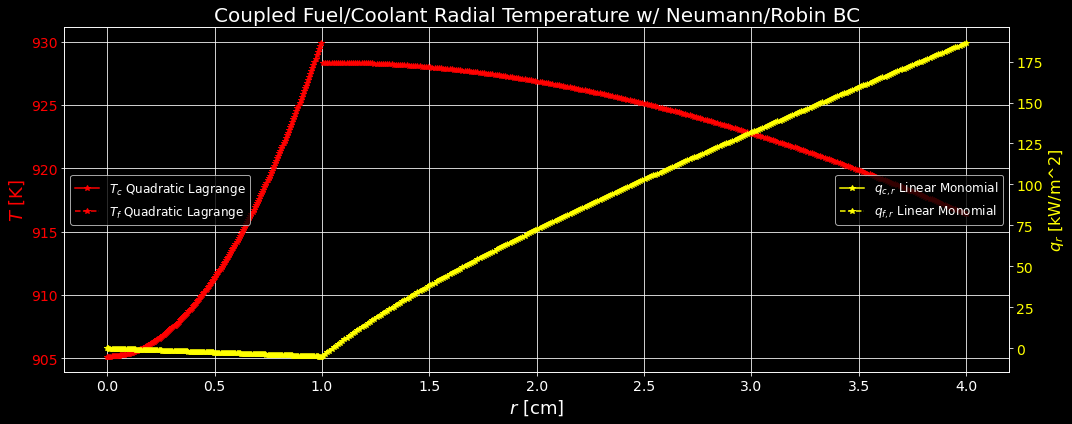

In [114]:
import pandas as pd
df1 = pd.read_csv('output_omega_1_0002.csv')
df2 = pd.read_csv('output_omega_2_0002.csv')

plot_solution(df1=df1, df2=df2, 
              x_scale=100,
              y2_scale=1/1000,
              xlabel=r'$r$ [cm]', 
              y1label=r'$T$ [K]',
              y2label=r'$q_r$ [kW/m^2]',
              title='Coupled Fuel/Coolant Radial Temperature w/ Neumann/Robin BC', 
              u1_legend=r'$T_c$ Quadratic Lagrange',
              u1_flux_legend=r'$q_{c,r}$ Linear Monomial',
              u2_legend=r'$T_f$ Quadratic Lagrange',
              u2_flux_legend=r'$q_{f,r}$ Linear Monomial',
              flux_decimal_digits=8)

## [Results and Analysis](#toc)<a id="ranalysis"></a>

In [101]:
'''Show 2D solution'''

import pyvista as pv
poisson = pv.read('out_000_0.vtu')
plo = pv.Plotter()   
plo.add_mesh(poisson, scalars='T', cmap='plasma', stitle='Temperature [K]')
plo.add_axes(xlabel='R', ylabel='Z', zlabel='Theta')
plo.set_viewup([1,0,0])
plo.screenshot('test.png')
cpos = plo.show(window_size=[800, 600])
#plotter.set_background('white')

FileNotFoundError: File (/home/dealmeida/OneDrive/uml-courses/engy-5310/2021-01-05-spring/jupynb-repo/projects/fhr/out_000_0.vtu) not found

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] Andreades, Charalampos et. al, [*Technical Description of the “Mark 1” Pebble-Bed Fluoride-Salt-Cooled High-Temperature Reactor (PB-FHR) Power Plant*](https://web.mit.edu/nse/pdf/researchstaff/forsberg/FHR%20Point%20Design%2014-002%20UCB.pdf), University of California Berkely, Dept. of Nuclear Engineering. 2014. 
- [4] author, [reference]()